In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plot

ds = pd.read_csv("Ecommerce Customers", index_col = None)
ds.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
ds.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


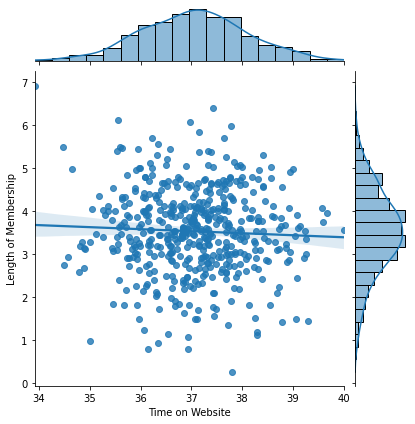

In [28]:
sb.jointplot(data=ds, x="Time on Website", y="Length of Membership", kind = 'reg')

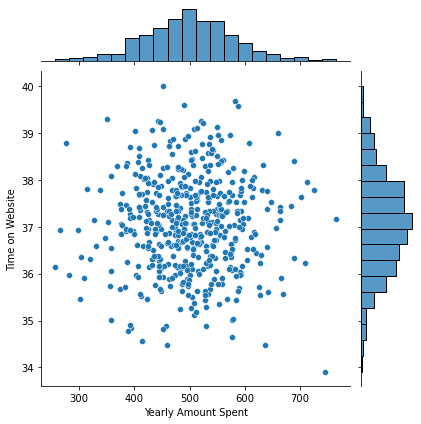

In [4]:
sb.jointplot(data=ds, x="Yearly Amount Spent", y="Time on Website")

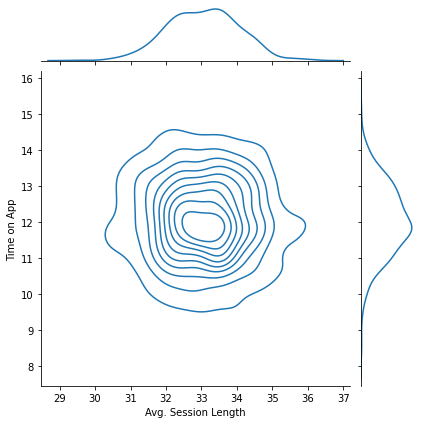

In [5]:
sb.jointplot(data=ds, x="Avg. Session Length", y="Time on App", kind = 'kde')

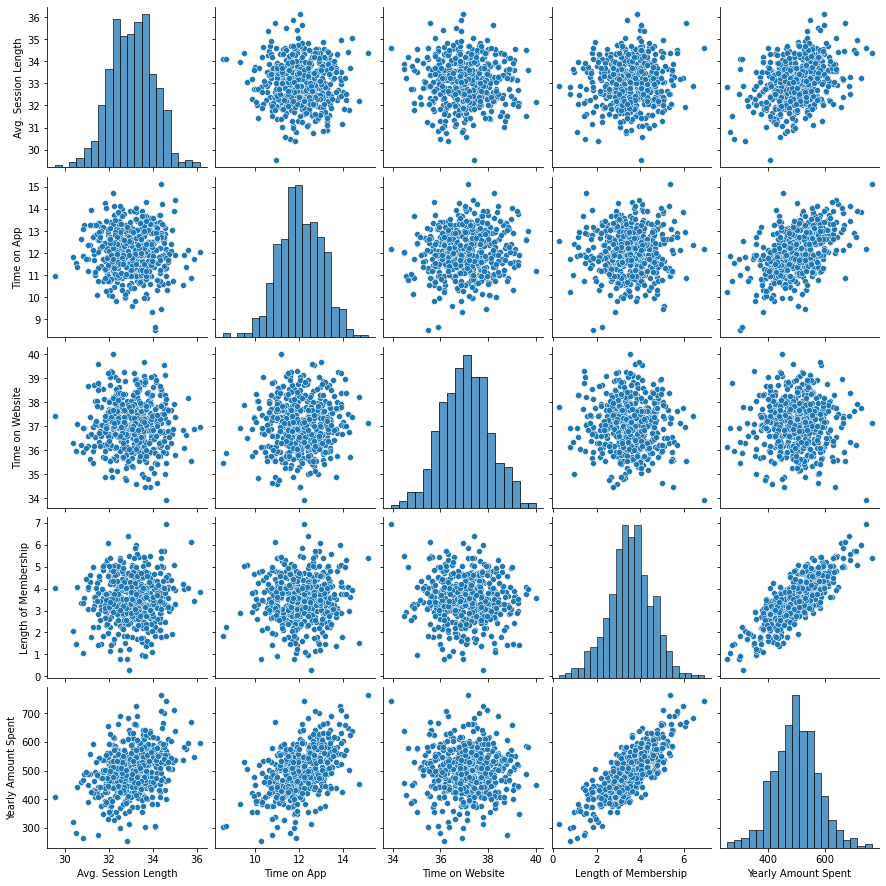

In [8]:
sb.pairplot(ds)

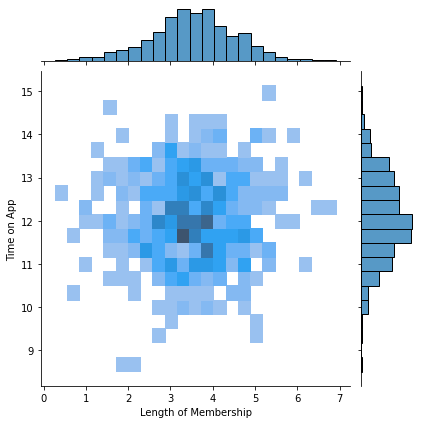

In [29]:
sb.jointplot(data=ds, x="Length of Membership", y="Time on App", kind = 'hist')

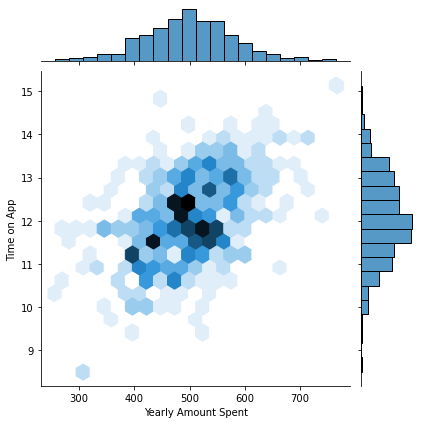

In [30]:
sb.jointplot(data=ds, x="Yearly Amount Spent", y="Time on App", kind = 'hex')

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

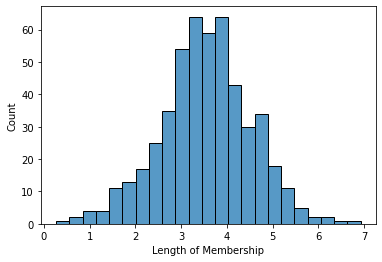

In [21]:
sb.histplot(ds['Length of Membership'])

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

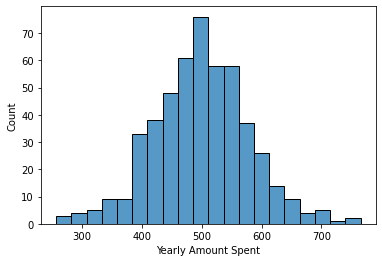

In [22]:
sb.histplot(ds['Yearly Amount Spent'])

<AxesSubplot:xlabel='Time on Website', ylabel='Count'>

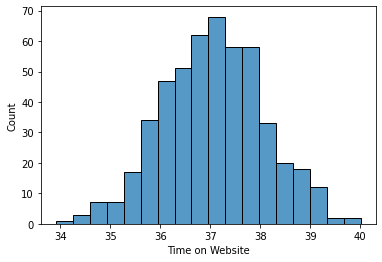

In [23]:
sb.histplot(ds['Time on Website'])

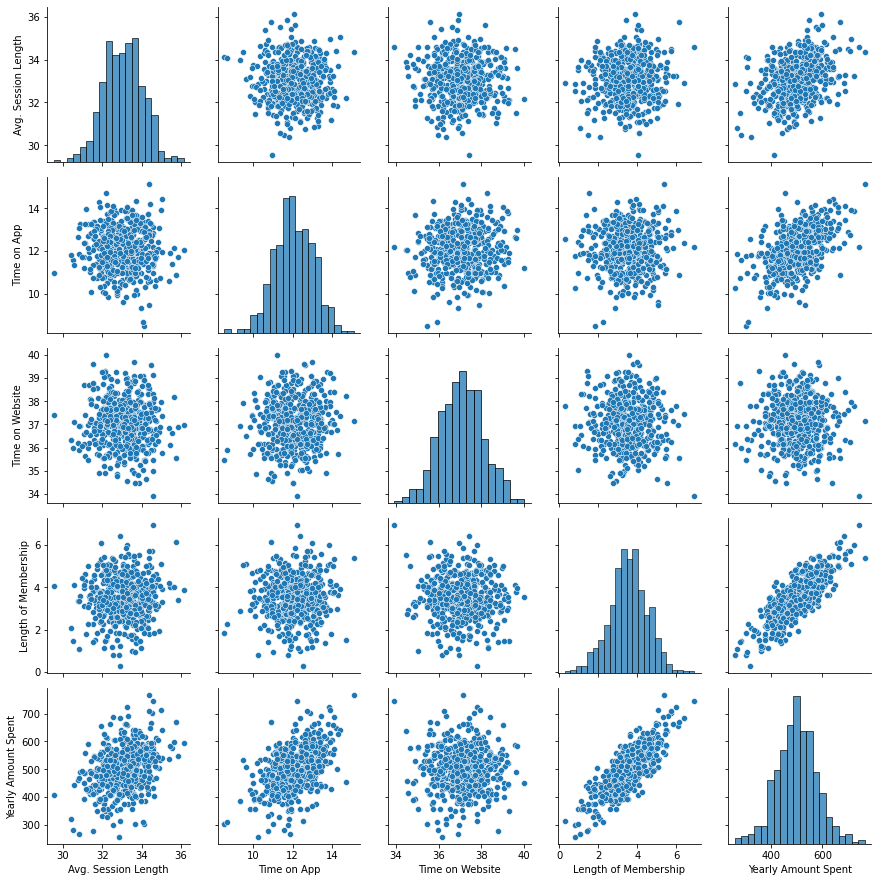

In [31]:
g = sb.PairGrid(ds)
g.map_diag(sb.histplot)
g.map_offdiag(sb.scatterplot)

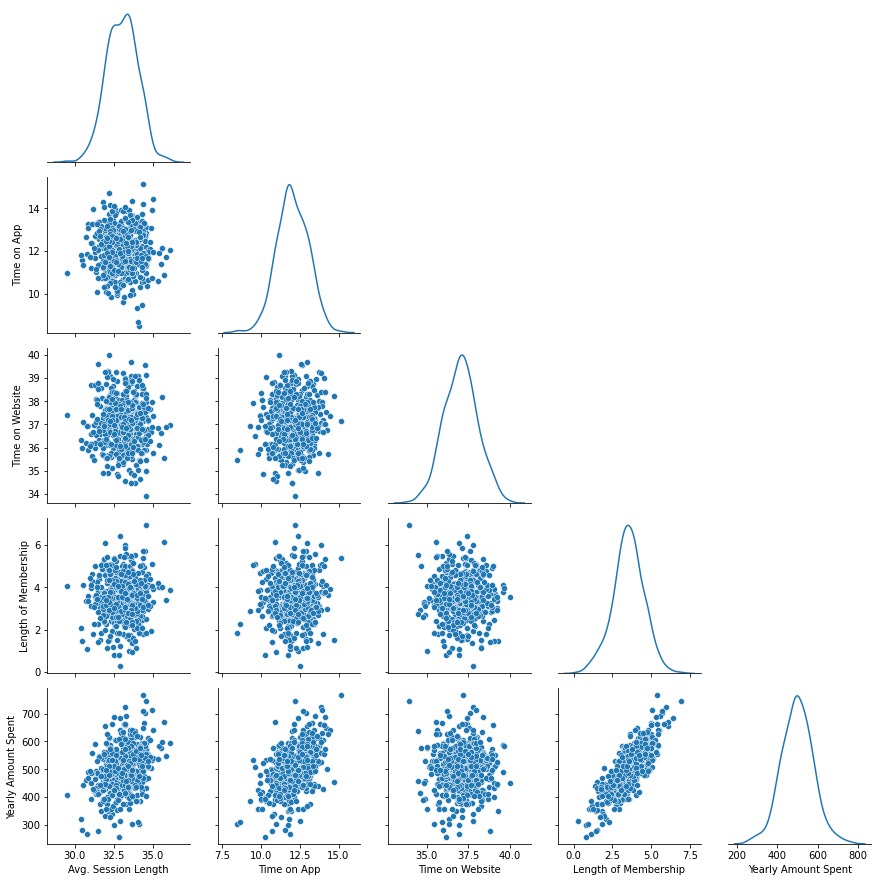

In [33]:
g = sb.PairGrid(ds, diag_sharey=False, corner=True)
g.map_lower(sb.scatterplot)
g.map_diag(sb.kdeplot)

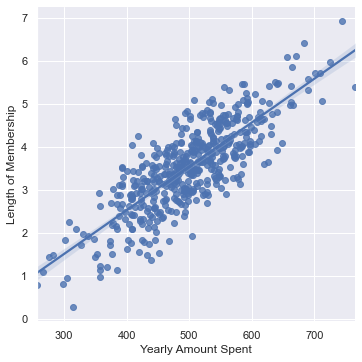

In [35]:
sb.set_theme(color_codes=True)
g = sb.lmplot(x="Yearly Amount Spent", y="Length of Membership", data=ds)

In [44]:
X = ds[['Length of Membership','Time on Website', 'Time on App','Avg. Session Length']]
y = ds['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,
random_state = 100)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm1.fit(X_train,y_train)
predict = lm1.predict(X_test)
print(y_test,predict)

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
46     593.915003
50     725.584814
78     488.786061
304    494.687156
478    487.646232
Name: Yearly Amount Spent, Length: 125, dtype: float64 [444.98856026 571.92442774 543.59840021 435.39730375 516.77039046
 472.75431143 397.67061878 570.94237343 461.44205922 542.94995184
 464.00570303 443.06214185 452.15496579 486.50255043 643.64157824
 500.6279288  490.8893546  468.13642692 492.21580432 336.7031269
 426.87715267 506.96058238 623.54511832 667.58730951 387.05209875
 559.38032561 495.35428415 435.22156801 511.5589833  459.81508608
 379.91011358 462.9172924  479.68904442 425.64154742 570.83904266
 646.43568366 628.40451581 523.3330091  486.76594651 516.81529141
 554.45516648 481.2374467  505.3050187  567.14619271 471.748178
 590.6250266  404.46193844 490.55024042 531.59895436 451.75735223
 563.48373205 496.78221117 683.06113931 531.05142841 531.68568055
 491.78212703 313.471361

In [45]:
X = ds[['Yearly Amount Spent','Time on App','Length of Membership','Avg. Session Length']]
y = ds['Time on Website']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
random_state = 100)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lm1.fit(X_train,y_train)
predict = lm1.predict(X_test)
print(y_test,predict)

69     40.005182
29     37.277812
471    36.378271
344    37.840655
54     38.468321
         ...    
460    36.838657
152    37.396497
154    36.959643
56     39.252931
392    37.128039
Name: Time on Website, Length: 100, dtype: float64 [36.94601683 36.87840516 36.91592037 37.02810746 37.10789792 37.05023865
 36.82020359 36.95142766 36.90047326 36.99380686 36.87827781 36.92836356
 36.88889338 36.97818885 37.16297293 36.94258725 36.93950774 37.13056399
 36.95214932 36.97353302 36.92314957 36.89891783 37.0582329  37.10246595
 36.95730877 37.06265738 37.06130427 36.92123823 37.06254257 36.85231377
 37.0239217  37.09665891 36.89663971 36.76522753 37.21133263 37.05074367
 37.08024724 36.78041766 37.0115089  36.90364641 37.16592393 37.03600533
 36.90529333 37.00009615 36.86654527 36.81407509 36.95398864 37.03854155
 36.96580203 36.9833386  37.01772635 36.99664978 36.74676307 36.96495636
 36.9244925  36.99153956 36.98162734 37.00036074 37.18595812 37.08391551
 37.14805137 37.10611031 36.9934